<a href="https://colab.research.google.com/github/zahratorki/calculator/blob/main/ab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# بارگیری دیتاست Abalone

In [2]:
url ="/content/abalon.csv"

In [3]:
names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [15]:
data = pd.read_csv(url, names=names, skiprows=1)

# جدا کردن متغیرهای ویژگی و متغیر پاسخ

In [16]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [17]:
print(data.head())

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


# مقیاس‌کردن داده‌ها

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# اعمال تحلیل ترکیب اصلی (PCA)

In [19]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# تعیین توضیحات درصدی واریانس

In [20]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# تعداد مؤلفه‌های PCA

In [21]:
num_components = len(explained_variance_ratio)

# نمایش درصد واریانس توضیح داده‌شده توسط هر مؤلفه

In [22]:
for i in range(num_components):
  print(f"Component {i+1}: {explained_variance_ratio[i]*100:.2f}%")

Component 1: 90.79%
Component 2: 3.99%
Component 3: 2.39%
Component 4: 1.63%
Component 5: 0.92%
Component 6: 0.18%
Component 7: 0.10%


# نمودار درصد واریانس توضیح داده‌شده توسط تعداد مؤلفه‌ها

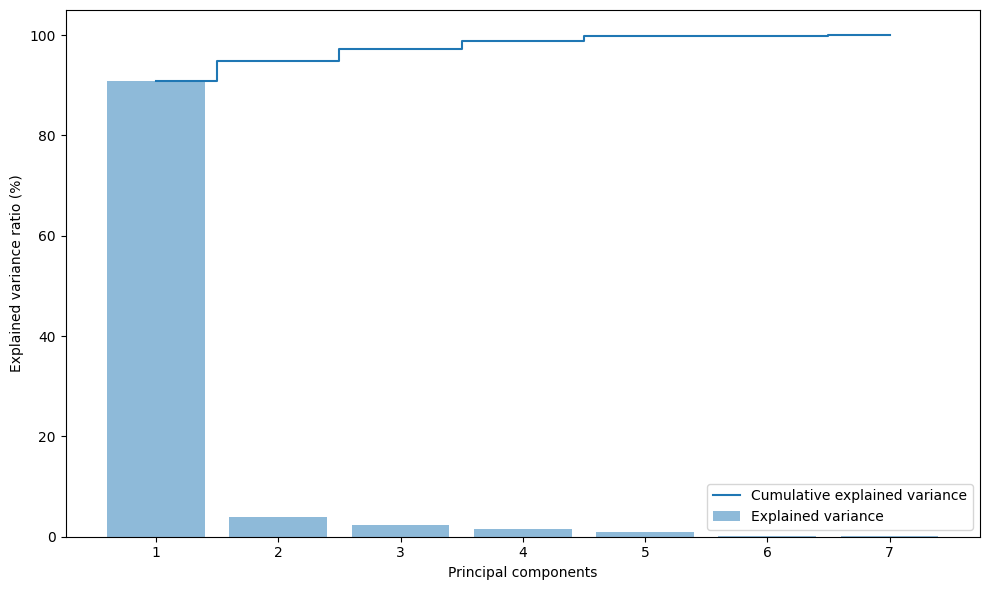

In [23]:
 plt.figure(figsize=(10, 6))
plt.bar(range(1, num_components + 1), explained_variance_ratio * 100, alpha=0.5, align='center',
        label='Explained variance')
plt.step(range(1, num_components + 1), cumulative_explained_variance * 100, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio (%)')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()